In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

from statsmodels.formula.api import ols

In [3]:
bike_data = pd.read_csv('datasets/bike_sharing_data_processed.csv')

In [4]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [5]:
bike_data.shape

(731, 7)

In [6]:
bike_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [8]:
bike_data.groupby('weathersit')['cnt'].describe().T

weathersit,1,2,3
count,463.000000,247.000000,21.000000
mean,4876.786177,4035.862348,1803.285714
std,1879.483989,1809.109918,1240.284449
min,431.000000,605.000000,22.000000
25%,3636.500000,2674.500000,705.000000
50%,4844.000000,4040.000000,1817.000000
75%,6458.500000,5257.500000,2424.000000
max,8714.000000,8362.000000,4639.000000


<Axes: title={'center': 'cnt'}, xlabel='weathersit'>

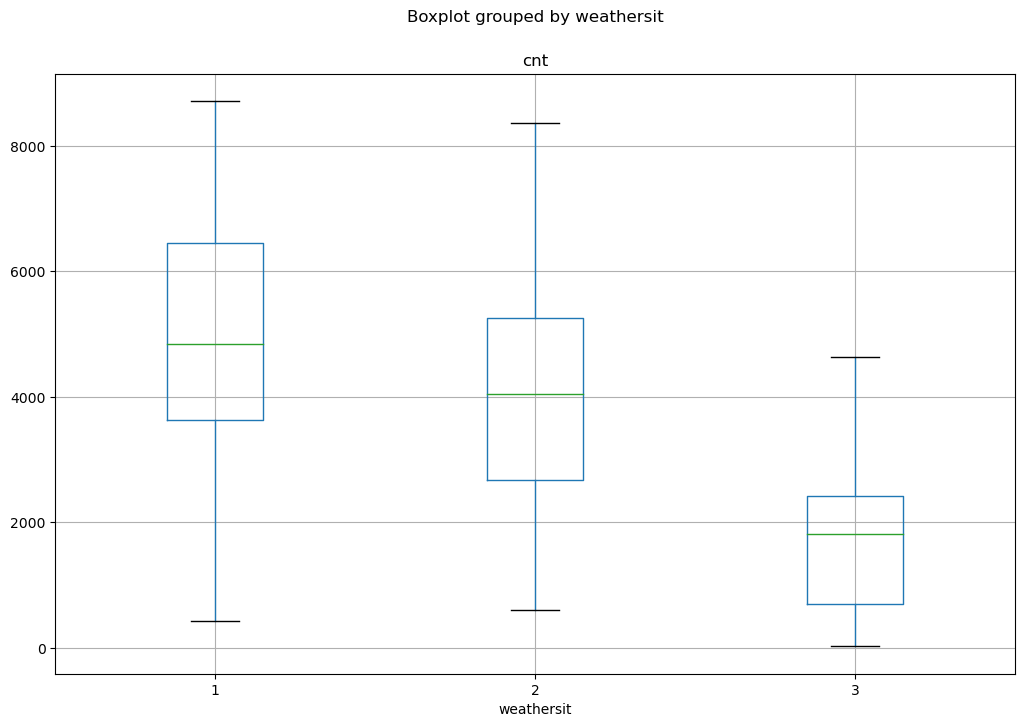

In [11]:
bike_data.boxplot(column=['cnt'], by='weathersit', figsize=(12,8))

In [12]:
#h0: No difference between means
#ha: difference between means exist somewhere

In [13]:
stats.f_oneway(bike_data['cnt'][bike_data['weathersit']==1],
               bike_data['cnt'][bike_data['weathersit']==2],
               bike_data['cnt'][bike_data['weathersit']==3])
               

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

In [14]:
#difference between means of these variables are signifigant, reject null hypothesis

In [15]:
result = ols('cnt ~ C(weathersit)', data = bike_data).fit()

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 09 May 2023   Prob (F-statistic):           3.11e-17
Time:                        17:08:39   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [17]:
bike_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [18]:
rp.summary_cont(bike_data.groupby(['weathersit']))['cnt']

C:\Users\aerap\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\aerap\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


<Axes: title={'center': 'cnt'}, xlabel='weathersit'>

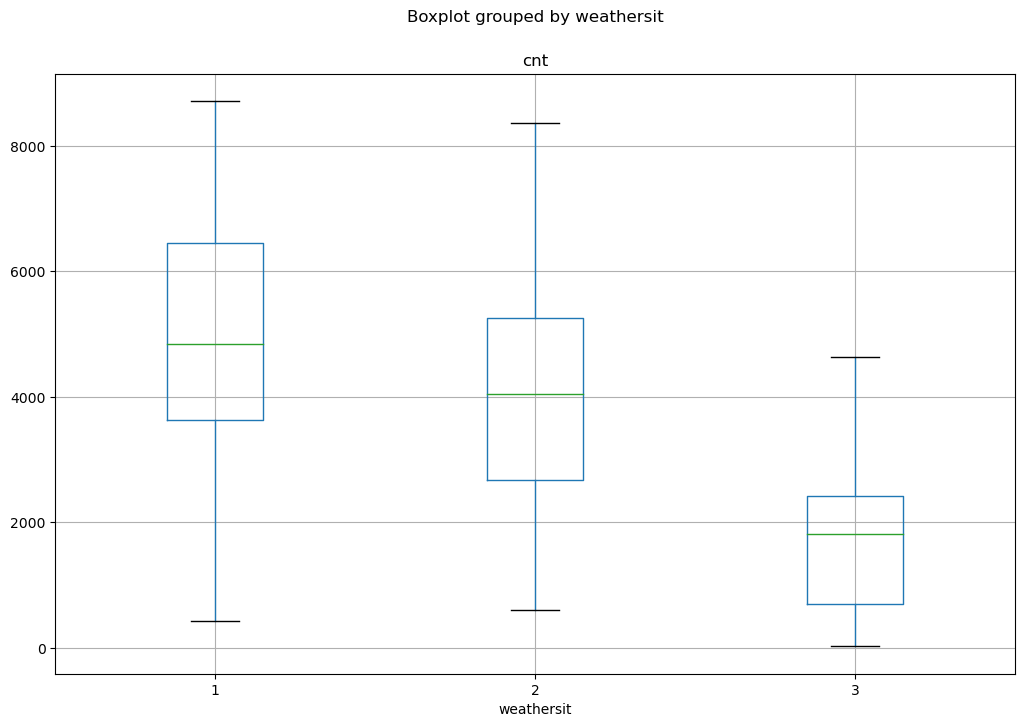

In [20]:
bike_data.boxplot(column=['cnt'],by='weathersit', figsize=(12,8))

In [21]:
rp.summary_cont(bike_data.groupby(['season']))['cnt']

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


<Axes: title={'center': 'cnt'}, xlabel='season'>

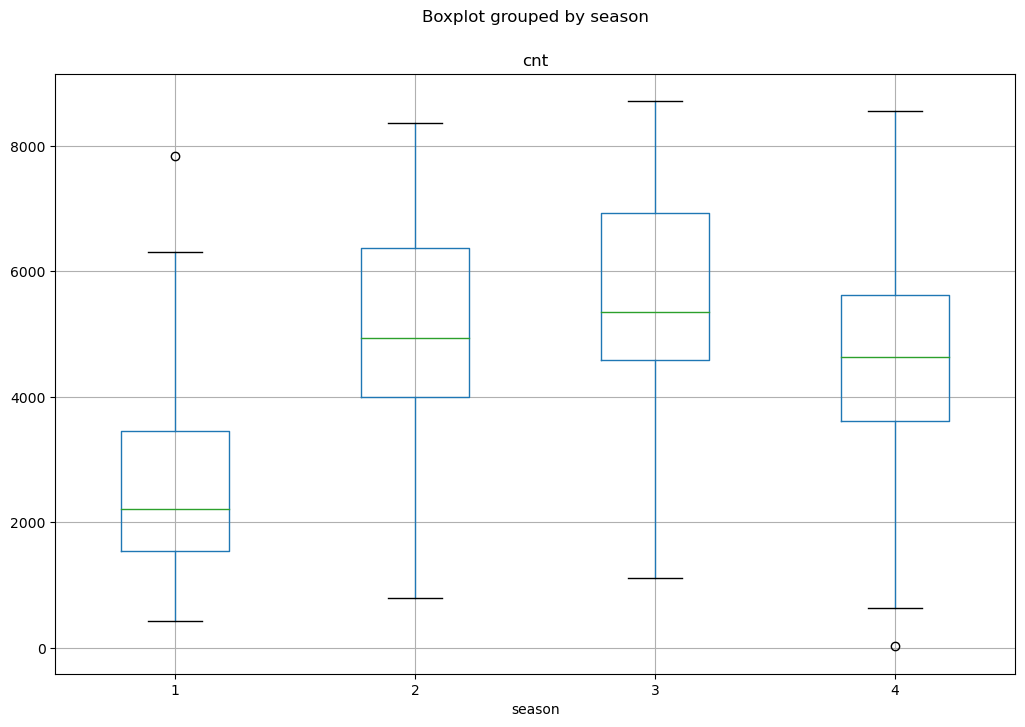

In [22]:
bike_data.boxplot(column=['cnt'],by='season', figsize=(12,8))

In [24]:
model= ols('cnt ~ C(weathersit)', bike_data).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Tue, 09 May 2023   Prob (F-statistic):           3.11e-17
Time:                        17:46:20   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

In [27]:
model= ols('cnt ~ C(season)', bike_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 09 May 2023   Prob (F-statistic):           6.72e-67
Time:                        17:57:26   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [28]:
model= ols('cnt ~ C(season) + C(season)', bike_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Tue, 09 May 2023   Prob (F-statistic):           6.72e-67
Time:                        17:58:43   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

In [30]:
import statsmodels.api as sm
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(season),3.0,9.505959e+08,3.168653e+08,128.769622,6.720391e-67
Residual,727.0,1.788940e+09,2.460715e+06,NaN,NaN


In [31]:
model = ols('cnt ~ C(weathersit)* C(season)', bike_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Tue, 09 May 2023   Prob (F-statistic):           5.25e-85
Time:                        18:39:26   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [32]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN
